In [7]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

df = pd.read_csv('AirPassengers.csv')
df.head(50)

df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
df1 = df.set_index(['Month'])
df1.head(5)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


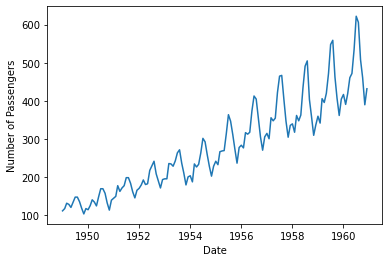

In [8]:
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(df1)

In [9]:
# To determine the rolling statistics
rolmean = df1.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level000
rolstad = df1.rolling(window=12).std()
print(rolmean, rolstad)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


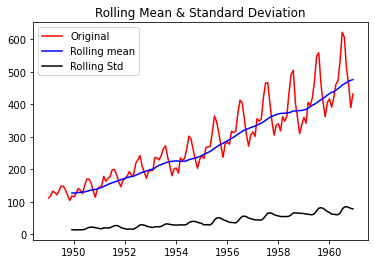

In [13]:
# Plot rolling statics
orig = plt.plot(df1, color = 'red', label ='Original')
mean = plt.plot(rolmean, color = 'blue', label ='Rolling mean')
std = plt.plot(rolstad, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [16]:
#Perform Augmented Dickey-Fuller test
print('Results of Dickey Fuller Test:')
df2 = adfuller(df1['#Passengers'], autolag = 'AIC')
dfoutput = pd.Series(df2[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df2[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
